
# Numbers

The `numpy` array is the foundation of essentially all numerical computing in Python, so it is important to understand the array and how to use it well.

## Learning objectives

1. Attributes of an array
2. How to create vectors, matrices, tensors
3. How to index and slice arrays
4. Generating random arrays and sampling
5. Universal functions, vectorization and matrix multiplication
6. Array axes and marginal calculations
7. Broadcasting
8. Masking
9. Combining and splitting arrays
10. Vectorizing loops

In [1]:
import numpy as np

## The `ndarray`: Vectors, matrices and tenosrs

dtype, shape, strides

### Vector

In [2]:
x = np.array([1,2,3])
x
#1-dim array -> vector

array([1, 2, 3])

In [3]:
type(x)

numpy.ndarray

In [4]:
x.dtype
#data type in array

dtype('int64')

In [5]:
x.shape
#dimension of array
#if column vector (3,1), row vector(1,3)

(3,)

In [6]:
x.strides
#bytes needed in moving to other element by axis
#64int - elements have 8 byte each and moving one elements cost 8 byte

(8,)

### Matrix

In [7]:
x = np.array([[1,2,3], [4,5,6]], dtype=np.int32)
x
#adjust dtype to reduce size of data

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [8]:
x.dtype

dtype('int32')

In [9]:
x.shape

(2, 3)

In [10]:
x.strides
#32int have 4 bytes each and 

(12, 4)

### Tensor

In [11]:
x = np.arange(24).reshape((2,3,4))
#3-dim array

In [12]:
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## Creating `ndarray`s

### From a file

In [13]:
%%file numbers.txt
a,b,c # can also skip headers
1,2,3
4,5,6

Overwriting numbers.txt


In [14]:
np.loadtxt('numbers.txt', dtype='int', delimiter=',',
           skiprows=1, comments='#')

array([[1, 2, 3],
       [4, 5, 6]])

### From Python lists or tuples

In [15]:
np.array([
    [1,2,3],
    [4,5,6]
])

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
np.array(((1,2,3),(4,5,6)))

array([[1, 2, 3],
       [4, 5, 6]])

### From ranges

arange, linspace, logspace

In [17]:
np.arange(1, 7).reshape((2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [18]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

In [19]:
np.linspace(1, 10, 4)
#seq from 1 to 10 showing 4 numbers

array([ 1.,  4.,  7., 10.])

In [20]:
np.logspace(0, 4, 5, dtype='int')
#Return numbers spaced evenly on a log scale(base)

array([    1,    10,   100,  1000, 10000])

### From a function

`fromfunciton`

In [21]:
np.fromfunction(lambda i, j: i*3 + j + 1, (2,3))
#ith row *3 + jth col + 1 and size of array

array([[1., 2., 3.],
       [4., 5., 6.]])

In [22]:
np.fromfunction(lambda i, j: (i-2)**2 + (j-2)**2, (5,5), dtype='int')
#i,j start from 0
#. indicate decimal(double type)

array([[8, 5, 4, 5, 8],
       [5, 2, 1, 2, 5],
       [4, 1, 0, 1, 4],
       [5, 2, 1, 2, 5],
       [8, 5, 4, 5, 8]])

#### How to visualize `fromfunction` 

In [23]:
j = np.repeat([np.arange(5)], 5, axis=0)
i = j.T
#axis mean direction of repeated array

In [24]:
i

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [25]:
j

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [26]:
(i-2)**2 + (j-2)**2

array([[8, 5, 4, 5, 8],
       [5, 2, 1, 2, 5],
       [4, 1, 0, 1, 4],
       [5, 2, 1, 2, 5],
       [8, 5, 4, 5, 8]])

#### Using element-wise functions in `fromfunction`

In [27]:
np.fromfunction(lambda i, j: np.where(i==j,0, -1), (5,5))

array([[ 0, -1, -1, -1, -1],
       [-1,  0, -1, -1, -1],
       [-1, -1,  0, -1, -1],
       [-1, -1, -1,  0, -1],
       [-1, -1, -1, -1,  0]])

In [28]:
np.fromfunction(lambda i, j: np.where(i<j, 1, np.where(i==j,0, -1)), (5,5))

array([[ 0,  1,  1,  1,  1],
       [-1,  0,  1,  1,  1],
       [-1, -1,  0,  1,  1],
       [-1, -1, -1,  0,  1],
       [-1, -1, -1, -1,  0]])

In [29]:
np.fromfunction(lambda i, j: np.minimum(i,j), (5,5), dtype='int')

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [0, 1, 2, 2, 2],
       [0, 1, 2, 3, 3],
       [0, 1, 2, 3, 4]])

In [30]:
np.fromfunction(lambda i, j: np.maximum(i,j), (5,5), dtype='int')

array([[0, 1, 2, 3, 4],
       [1, 1, 2, 3, 4],
       [2, 2, 2, 3, 4],
       [3, 3, 3, 3, 4],
       [4, 4, 4, 4, 4]])

### From special constructors

zeros, ones, eye, diag

In [31]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [32]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [33]:
np.eye(3)
#identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [34]:
np.eye(3, 4)
#it doesnt have to be sqaure

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [35]:
np.eye(4, k=-1)
#push -1 row

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [36]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [37]:
np.diag([1,2,3,4], k=1)
#push 1 row

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0]])

### From random variables

#### Convenience functions

rand, randn

In [38]:
np.random.rand(2,3)
#uniform random (0,1)

array([[0.0059192 , 0.55716745, 0.81187415],
       [0.59950623, 0.52593664, 0.41228173]])

In [39]:
np.random.randn(2,3)
#random number from N(0,1)

array([[-0.91893174,  1.11257584,  1.61452027],
       [ 1.31756198, -0.58453281, -0.41907758]])

#### Distributions

uniform, normal, randint, poisson, multinomial, multivariate_ normal

In [40]:
np.random.uniform(0, 1, (2,3))

array([[0.22827515, 0.04648942, 0.09919336],
       [0.83884438, 0.79930764, 0.29152036]])

In [41]:
np.random.normal(0, 1, (2,3))

array([[-0.84486717, -0.87224421, -2.10855406],
       [-1.2697093 , -1.67699673,  0.12502628]])

In [42]:
np.random.randint(0, 10, (4,5))
#integer from range

array([[9, 3, 4, 8, 2],
       [2, 3, 1, 3, 8],
       [7, 9, 5, 8, 8],
       [9, 3, 7, 3, 1]])

In [43]:
np.random.poisson(10, (4,5))

array([[ 5,  6, 10, 14,  8],
       [13,  9, 11, 12,  9],
       [ 8,  8, 15, 10, 16],
       [10,  1,  6,  9, 12]])

In [44]:
np.random.multinomial(n=5, pvals=np.ones(5)/5, size=8)

array([[2, 0, 0, 2, 1],
       [2, 0, 2, 1, 0],
       [1, 0, 1, 1, 2],
       [0, 2, 1, 1, 1],
       [3, 1, 0, 0, 1],
       [1, 1, 1, 2, 0],
       [2, 0, 1, 1, 1],
       [3, 0, 2, 0, 0]])

In [45]:
np.random.multivariate_normal(mean=[10,20,30], cov=np.eye(3), size=4)

array([[10.84736777, 19.68667267, 30.82879942],
       [10.4521705 , 19.4499646 , 30.1144988 ],
       [10.22975286, 19.93676061, 29.36808949],
       [11.06392058, 20.43861063, 29.35763289]])

### Sampling using `choice`

Works much like the R `sample` function.

In [46]:
x = np.random.permutation(list('ABCDEF'))

In [47]:
x

array(['D', 'A', 'F', 'C', 'B', 'E'], dtype='<U1')

In [48]:
np.random.choice(x, 3)
#defualt is replace is true

array(['A', 'F', 'B'], dtype='<U1')

In [49]:
np.random.choice(x, 10)

array(['F', 'D', 'B', 'E', 'C', 'C', 'F', 'D', 'B', 'E'], dtype='<U1')

In [50]:
try:
    np.random.choice(x, 10, replace=False)
except ValueError as e:
    print(e)

Cannot take a larger sample than population when 'replace=False'


## Indexing 

In [51]:
x = np.arange(20).reshape((4,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### Extracing a scalar

In [52]:
x[1,1]

6

### Extracting a vector

In [53]:
x[1]

array([5, 6, 7, 8, 9])

### Using slices

In [54]:
x[1,:]

array([5, 6, 7, 8, 9])

In [55]:
x[:,1]

array([ 1,  6, 11, 16])

In [56]:
x[1:3,1:3]
#does not include last margin

array([[ 6,  7],
       [11, 12]])

### Using slices with strides

In [57]:
x[::2,::2]
#even row and even col

array([[ 0,  2,  4],
       [10, 12, 14]])

### Extrcting blocks with arbitrary row and column lists (fancy indexing)

`np.ix_`

In [58]:
x[:, [0,3]]
#all row 0,3th column

array([[ 0,  3],
       [ 5,  8],
       [10, 13],
       [15, 18]])

Warning: Fancy indexing can only be used for 1 dimension at a time.

In the example below, `numpy` treats the arguments as *paired* coordinates, and returns the values at (0,0) and (2,3).

In [59]:
x[[0,2],[0,3]]
#index 0,0 and 2,3

array([ 0, 13])

Use the helper `np.ix_` to extract arbitrary blocks.

In [60]:
x[np.ix_([0,2], [0,3])]

array([[ 0,  3],
       [10, 13]])

### A slice is a view, not a copy

**Warning**

```python
b = a[:]
```

makes a copy if `a` is a list but not if `a` is a numpy array

In [61]:
a1 = list(range(3))
a2 = np.arange(3)

In [62]:
b = a1[:]
b[1] = 9
a1
#not affect original

[0, 1, 2]

In [63]:
b = a2[:]
b[1] = 9
a2
#affect original

array([0, 9, 2])

In [64]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [65]:
y = x[1:-1, 1:-1]
y
#1th row to last row and 1th col to last col

array([[ 6,  7,  8],
       [11, 12, 13]])

In [66]:
y *= 10

In [67]:
y

array([[ 60,  70,  80],
       [110, 120, 130]])

In [68]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

Use the copy method to convert a view to a copy

In [69]:
z = x[1:-1, 1:-1].copy()

In [70]:
z

array([[ 60,  70,  80],
       [110, 120, 130]])

In [71]:
z[:] = 0

In [72]:
z

array([[0, 0, 0],
       [0, 0, 0]])

In [73]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

### Boolean indexing

In [74]:
x[x % 2 == 0]

array([  0,   2,   4,  60,  70,  80,  10, 110, 120, 130,  14,  16,  18])

In [75]:
x [x > 3]

array([  4,   5,  60,  70,  80,   9,  10, 110, 120, 130,  14,  15,  16,
        17,  18,  19])

In [76]:
x > 3

array([[False, False, False, False,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

### Functions that return indexes

In [77]:
idx = np.nonzero(x)
idx
#first array is row and second array is column

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]),
 array([1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

In [78]:
x[idx]

array([  1,   2,   3,   4,   5,  60,  70,  80,   9,  10, 110, 120, 130,
        14,  15,  16,  17,  18,  19])

In [79]:
idx = np.where(x > 3)
idx

(array([0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]),
 array([4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

In [80]:
x[idx]

array([  4,   5,  60,  70,  80,   9,  10, 110, 120, 130,  14,  15,  16,
        17,  18,  19])

## Universal functions

In [81]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

Operations

In [82]:
x + x

array([[  0,   2,   4,   6,   8],
       [ 10, 120, 140, 160,  18],
       [ 20, 220, 240, 260,  28],
       [ 30,  32,  34,  36,  38]])

Element-wise functions

In [83]:
np.log1p(x)
#log(1+x)

array([[0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791],
       [1.79175947, 4.11087386, 4.26267988, 4.39444915, 2.30258509],
       [2.39789527, 4.7095302 , 4.79579055, 4.87519732, 2.7080502 ],
       [2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227]])

In [84]:
x.clip(10, 100)
#below min become min and bigger than max become max

array([[ 10,  10,  10,  10,  10],
       [ 10,  60,  70,  80,  10],
       [ 10, 100, 100, 100,  14],
       [ 15,  16,  17,  18,  19]])

Scans

In [85]:
np.cumsum(x, axis=1)
#axis is direction of margin

array([[  0,   1,   3,   6,  10],
       [  5,  65, 135, 215, 224],
       [ 10, 120, 240, 370, 384],
       [ 15,  31,  48,  66,  85]])

Reductions

In [86]:
np.sum(x)

703

In [87]:
x.prod()

0

## Margins and the `axis` argument

In [88]:
x

array([[  0,   1,   2,   3,   4],
       [  5,  60,  70,  80,   9],
       [ 10, 110, 120, 130,  14],
       [ 15,  16,  17,  18,  19]])

The 0th axis has 4 items, the 1st axis has 5 items.

In [89]:
x.shape

(4, 5)

In [90]:
x.mean()
#if not indicate margins, every row and col summaries

35.15

### Marginalizing out the 0th axis = column summaries

In [91]:
x.mean(axis=0)

array([ 7.5 , 46.75, 52.25, 57.75, 11.5 ])

### Marginalizing out the 1st axis = row summaries

In [92]:
x.mean(axis=1)

array([ 2. , 44.8, 76.8, 17. ])

Note marginalizing out the last axis is a common default.

In [93]:
x.mean(axis=-1)
#if axis is not 0, rest are same for row summaries

array([ 2. , 44.8, 76.8, 17. ])

### Marginalization works for higher dimensions in the same way

In [94]:
x = np.random.random((2,3,4))
x

array([[[0.54364463, 0.79190159, 0.14773656, 0.14133134],
        [0.206941  , 0.84394286, 0.68465288, 0.66897943],
        [0.64797627, 0.56178402, 0.84679106, 0.27926797]],

       [[0.72516952, 0.77754781, 0.6660935 , 0.23735024],
        [0.89008056, 0.31960404, 0.80034874, 0.15974248],
        [0.09921855, 0.35888697, 0.54434057, 0.3423014 ]]])

In [95]:
x.shape

(2, 3, 4)

In [96]:
x.mean(axis=0).shape
#marginalize based 0th dim

(3, 4)

In [97]:
x.mean(axis=1).shape
#marginalize based 1th dim

(2, 4)

In [98]:
x.mean(axis=2).shape
#marginalize based 2th dim

(2, 3)

In [99]:
x.mean(axis=(0,1)).shape

(4,)

In [100]:
x.mean(axis=(0,2)).shape

(3,)

In [101]:
x.mean(axis=(1,2)).shape

(2,)

## Broadcasting

Broadcasting is what happens when `numpy` tries to perform binary operations on two arrays with different shapes. In general, shapes are *promoted* to make the arrays compatible using the following rule

- For each axis from highest to lowest
    - If both dimensions are the same, do nothing
    - If one of the dimensions is 1 or None and the other is $k$, promote to $k$
    - Otherwise print error message

In [102]:
x = np.zeros((3,2))
x.shape

(3, 2)

In [103]:
x

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

Shapes are compatible

In [104]:
y = np.ones(2)
y.shape

(2,)

In [105]:
x + y
#why? even if they have different dim

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Shapes are compatible

In [106]:
y = np.ones((1,2))
y.shape

(1, 2)

In [107]:
x + y
#still work very weird

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Shapes are incompatible but can be made compaible by adding empty dimension

In [108]:
y = np.ones(3)
y.shape

(3,)

In [109]:
try:
    x + y
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,2) (3,) 


In [110]:
y[:, None].shape
#create extra dummy column

(3, 1)

In [111]:
x + y[:, None]
#then works

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Shapes are incompatible

In [112]:
y = np.ones((2,2))
y.shape

(2, 2)

In [113]:
try:
    x + y
except ValueError as e:
    print(e)
#is there any logic for this? I have no idea

operands could not be broadcast together with shapes (3,2) (2,2) 


### More examples of broadcasting

In [114]:
x1 = np.arange(12)

In [115]:
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [116]:
x1 * 10
#vector operation

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

In [117]:
x2 = np.random.randint(0,10,(3,4))

In [118]:
x2

array([[4, 0, 7, 2],
       [3, 1, 7, 0],
       [6, 4, 9, 4]])

In [119]:
x2 * 10
#matrix operation

array([[40,  0, 70, 20],
       [30, 10, 70,  0],
       [60, 40, 90, 40]])

In [120]:
x2.shape

(3, 4)

(3,4) <--> (1,4) then 1 is duplicated

should match dim of argument  
1. y[:np.newaxis] or 
2. y[:None]
3. y = y.reshape(-1,1) or (3,1) -> (3,1)

### Column-wise broadcasting

In [121]:
mu = np.mean(x2, axis=0)
mu.shape

(4,)

In [122]:
x2 - mu
#column mean

array([[-0.33333333, -1.66666667, -0.66666667,  0.        ],
       [-1.33333333, -0.66666667, -0.66666667, -2.        ],
       [ 1.66666667,  2.33333333,  1.33333333,  2.        ]])

In [123]:
(x2 - mu).mean(axis=0)

array([ 2.96059473e-16, -1.48029737e-16, -2.96059473e-16,  0.00000000e+00])

### Row wise broadcasting

In [124]:
mu = np.mean(x2, axis=1)
mu.shape

(3,)

In [125]:
try:
    x2 - mu
except ValueError as e:
    print(e)
#shape is wrong

operands could not be broadcast together with shapes (3,4) (3,) 


### We can add a "dummy" axis using None or `np.newaxis`

In [126]:
mu[:, None].shape

(3, 1)

In [127]:
x2 - mu[:, None]
#row mean

array([[ 0.75, -3.25,  3.75, -1.25],
       [ 0.25, -1.75,  4.25, -2.75],
       [ 0.25, -1.75,  3.25, -1.75]])

In [128]:
x2 - mu[:, np.newaxis]

array([[ 0.75, -3.25,  3.75, -1.25],
       [ 0.25, -1.75,  4.25, -2.75],
       [ 0.25, -1.75,  3.25, -1.75]])

In [129]:
np.mean(x2 - mu[:, None], axis=1)

array([0., 0., 0.])

#### Reshaping works too

In [130]:
x2 - mu.reshape((-1,1))

array([[ 0.75, -3.25,  3.75, -1.25],
       [ 0.25, -1.75,  4.25, -2.75],
       [ 0.25, -1.75,  3.25, -1.75]])

#### Exercise in broadcasting

Creating a 12 by 12 multiplication table

In [131]:
x = np.arange(1, 13)
x[:,None] * x[None,:]
#(12:1) * (1:12) rank 1 matrix

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])

Scaling to have zero mean and unit standard devation for each feature.

In [132]:
x = np.random.normal(10, 5,(3,4))
x

array([[12.98264339, 13.77298042, 19.33611785,  9.96299045],
       [17.67770767, 15.00915696,  4.60556703, 15.92686132],
       [ 5.18615472,  8.47789685,  5.36431542,  4.55750263]])

`Scaling column-wise

In [133]:
(x - x.mean(axis=0))/x.std(axis=0)

array([[ 0.20066999,  0.4776064 ,  1.41273348, -0.04008447],
       [ 1.11201754,  0.91398434, -0.76238528,  1.24429504],
       [-1.31268753, -1.39159073, -0.6503482 , -1.20421057]])

Scaling row-wise

In [134]:
(x - x.mean(axis=1)[:, None])/x.std(axis=1)[:, None]

array([[-0.30450935, -0.0710896 ,  1.57193874, -1.1963398 ],
       [ 0.85521582,  0.33332076, -1.70133504,  0.51279847],
       [-0.46724186,  1.69805765, -0.35004821, -0.88076758]])

## Masking

- [Ref](https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html)

extract specific feature
boolean matrix

In [135]:
import numpy.ma as ma

In [136]:
x = np.arange(20).reshape(4,5)

In [137]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [138]:
mask = x % 2 == 0
mask

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

- Note that values that are True in the mask are not used in the array
- Values that are False are *not* masked and so remain
- So the above mask keeps only the *odd* numbers in the array `x`

In [139]:
m = ma.masked_array(x, mask)

In [140]:
m

masked_array(
  data=[[--, 1, --, 3, --],
        [5, --, 7, --, 9],
        [--, 11, --, 13, --],
        [15, --, 17, --, 19]],
  mask=[[ True, False,  True, False,  True],
        [False,  True, False,  True, False],
        [ True, False,  True, False,  True],
        [False,  True, False,  True, False]],
  fill_value=999999)

In [141]:
m.data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [142]:
m.mask

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [143]:
m.sum(axis=0).data

array([20, 12, 24, 16, 28])

In [144]:
m.sum(axis=1).data

array([ 4, 21, 24, 51])

### Often used with missing value sentinels

In [145]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore', RuntimeWarning)
    x1 = x / mask

In [146]:
x1

array([[ 0., inf,  2., inf,  4.],
       [inf,  6., inf,  8., inf],
       [10., inf, 12., inf, 14.],
       [inf, 16., inf, 18., inf]])

In [147]:
x1.sum()

inf

In [148]:
x2 = ma.masked_invalid(x1)
x2

masked_array(
  data=[[0.0, --, 2.0, --, 4.0],
        [--, 6.0, --, 8.0, --],
        [10.0, --, 12.0, --, 14.0],
        [--, 16.0, --, 18.0, --]],
  mask=[[False,  True, False,  True, False],
        [ True, False,  True, False,  True],
        [False,  True, False,  True, False],
        [ True, False,  True, False,  True]],
  fill_value=1e+20)

In [149]:
x2.data

array([[ 0., inf,  2., inf,  4.],
       [inf,  6., inf,  8., inf],
       [10., inf, 12., inf, 14.],
       [inf, 16., inf, 18., inf]])

In [150]:
x2.mask

array([[False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True]])

In [151]:
x2.sum()

90.0

In [152]:
x2.filled(0)

array([[ 0.,  0.,  2.,  0.,  4.],
       [ 0.,  6.,  0.,  8.,  0.],
       [10.,  0., 12.,  0., 14.],
       [ 0., 16.,  0., 18.,  0.]])

## Combining `ndarray`s

In [153]:
x1 = np.zeros((3,4))
x2 = np.ones((3,5))
x3 = np.eye(4)

In [154]:
x1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [155]:
x2

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [156]:
x3

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Binding rows when number of columns is the same

In [157]:
np.r_[x1, x3]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Binding columns when number of rows is the same

In [158]:
np.c_[x1, x2]

array([[0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.]])

### You can combine more than 2 at a time

In [159]:
np.c_[x1, x2, x1]

array([[0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.]])

### Stacking

In [160]:
np.vstack([x1, x3])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [161]:
np.hstack([x1, x2])

array([[0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.]])

In [162]:
np.dstack([x2, 2*x2, 3*x2])

array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

### Generic stack with axis argument

In [163]:
np.stack([x2, 2*x2, 3*x2], axis=0)

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]]])

In [164]:
np.stack([x2, 2*x2, 3*x2], axis=1)

array([[[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]],

       [[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]],

       [[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]]])

In [165]:
np.stack([x2, 2*x2, 3*x2], axis=2)

array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

### Repetition and tiling

#### For a vector

In [166]:
x = np.array([1,2,3])

In [167]:
np.repeat(x, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [168]:
np.tile(x, 3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

#### For a matrix

In [169]:
x = np.arange(6).reshape((2,3))
x

array([[0, 1, 2],
       [3, 4, 5]])

In [170]:
np.repeat(x, 3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5])

In [171]:
np.repeat(x, 3, axis=0)

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [3, 4, 5],
       [3, 4, 5],
       [3, 4, 5]])

In [172]:
np.repeat(x, 3, axis=1)

array([[0, 0, 0, 1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4, 5, 5, 5]])

In [173]:
np.tile(x, (3,2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

## Splitting `ndarray`s

In [174]:
x = np.arange(32).reshape((4,8))

In [175]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])

In [176]:
np.split(x, 4)

[array([[0, 1, 2, 3, 4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11, 12, 13, 14, 15]]),
 array([[16, 17, 18, 19, 20, 21, 22, 23]]),
 array([[24, 25, 26, 27, 28, 29, 30, 31]])]

In [177]:
np.split(x, 4, axis=1)

[array([[ 0,  1],
        [ 8,  9],
        [16, 17],
        [24, 25]]), array([[ 2,  3],
        [10, 11],
        [18, 19],
        [26, 27]]), array([[ 4,  5],
        [12, 13],
        [20, 21],
        [28, 29]]), array([[ 6,  7],
        [14, 15],
        [22, 23],
        [30, 31]])]

## Saving and loading arrays

In [178]:
x = np.arange(16).reshape(4,4)
y = np.arange(20).reshape(-1,4)

In [179]:
np.save('x.npy', x)

In [180]:
np.load('x.npy')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [181]:
np.savez('xy.npz', x=x, y=y)

In [182]:
arr = np.load('xy.npz')

In [183]:
arr['x']

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [184]:
arr['y']

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [185]:
arr.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f06604215f8>)

In [186]:
import os

In [187]:
os.remove('x.npy')

In [188]:
os.remove('xy.npz')

## Vectorization

### Example 1

The operators and functions (ufuncs) in Python are vectorized, and will work element-wise over all entries in an `ndarray`.

In [189]:
xs = np.zeros(10, dtype='int')
for i in range(10):
    xs[i] = i**2
xs

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [190]:
xs = np.arange(10)**2
xs

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Using ufuncs

In [191]:
np.sqrt(xs)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [192]:
np.log1p(xs)

array([0.        , 0.69314718, 1.60943791, 2.30258509, 2.83321334,
       3.25809654, 3.61091791, 3.91202301, 4.17438727, 4.40671925])

### Example 2

Scalar product.

In [193]:
n = 10

xs = np.random.rand(n)
ys = np.random.rand(n)

s = 0
for i in range(n):
    s += xs[i] * ys[i]
s

1.5643980889806988

In [194]:
np.dot(xs, ys)

1.5643980889806988

In [195]:
xs @ ys

1.5643980889806988

### Example 3

\begin{align}
y_0 &= \alpha + \beta_1 x_1 + \beta_2 x_2 \\
y_1 &= \alpha + \beta_1 x_1 + \beta_2 x_2 \\
y_2 &= \alpha + \beta_1 x_1 + \beta_2 x_2 \\
\end{align}




In [196]:
m = 3
n = 2

alpha = np.random.rand(1)
betas = np.random.rand(n,1)
xs = np.random.rand(m,n)

In [197]:
alpha

array([0.61068432])

In [198]:
betas

array([[0.09699702],
       [0.41462492]])

In [199]:
xs

array([[0.35669365, 0.82294931],
       [0.33276575, 0.63385236],
       [0.97454252, 0.08530412]])

### Using loops

In [200]:
ys = np.zeros((m,1))
for i in range(m):
    ys[i] = alpha
    for j in range(n):
        ys[i] += betas[j] * xs[i,j]
ys

array([[0.98649783],
       [0.90577259],
       [0.74058126]])

### Removing inner loop

In [201]:
ys = np.zeros((m,1))
for i in range(m):
    ys[i] = alpha + xs[i,:].T @ betas
ys

array([[0.98649783],
       [0.90577259],
       [0.74058126]])

### Removing all loops

In [202]:
ys = alpha + xs @ betas
ys

array([[0.98649783],
       [0.90577259],
       [0.74058126]])

### Alternative approach

The calculaiton with explicit intercepts and coefficients is common in deep learning, where $\alpha$ is called the bias ($b$) and $\beta$ are called the weights ($w$), and each equation is $y[i] = b + w[i]*x[i]$.

It is common in statisiics to use an augmented matrix in which the first column is all ones, so that all that is needed is a single matrix multiplicaiotn.

In [203]:
X = np.c_[np.ones(m), xs]
X

array([[1.        , 0.35669365, 0.82294931],
       [1.        , 0.33276575, 0.63385236],
       [1.        , 0.97454252, 0.08530412]])

In [204]:
alpha

array([0.61068432])

In [205]:
betas

array([[0.09699702],
       [0.41462492]])

In [206]:
betas_ = np.concatenate([[alpha], betas])
betas_

array([[0.61068432],
       [0.09699702],
       [0.41462492]])

In [207]:
ys = X @ betas_
ys

array([[0.98649783],
       [0.90577259],
       [0.74058126]])

### Simulating diffusion

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt

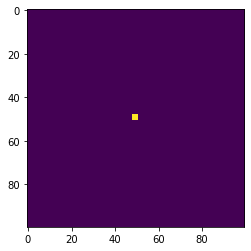

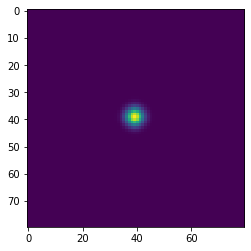

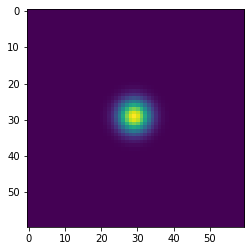

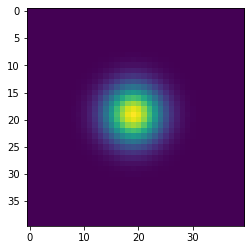

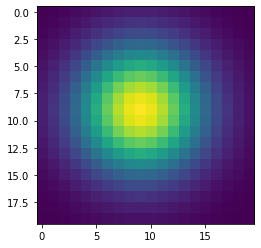

In [209]:
w = 100
h = 100
x = np.zeros((w+2,h+2), dtype='float')
x[(w//2-1):(w//2+2), (h//2-1):(h//2+2)] = 1

wts = np.ones(5)/5

for i in range(41):
    if i % 10 == 0:    
        plt.figure()
        plt.imshow(x[1:-1, 1:-1], interpolation='nearest')
        
    center = x[1:-1, 1:-1]
    left = x[:-2, 1:-1]
    right = x[2:, 1:-1]
    bottom = x[1:-1, :-2]
    top = x[1:-1, 2:]
    nbrs = np.dstack([center, left, right, bottom, top])
    x = np.sum(wts * nbrs, axis=-1)